# Obtener la temperatura reducida $T^*$ como una funcion de $\lambda$ para D = 1 a 5.

In [273]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy import optimize

## Definimos algunas expresiones que debemos evaluar

$1 + D \int_{0}^{\frac{\lambda}{\lambda -\lambda}} x^{D - 1} f_{CP}(x)dx$

Donde:

$f_{CP}(x) = e^{-\beta u_{CP}}(x) - 1$

$\beta = (k_{b}T)^{-1}$

$x = \frac{r}{\sigma}$

$u_{CP}(r) = A \epsilon\left[(1/x)^\lambda - (1/x)^{\lambda - 1}\right] + \epsilon$ si $r < \sigma B$

$u_{CP}(r) = 0$ si $r\geq \sigma B$

$ A = \frac{\lambda_{r}}{\lambda_{r}-\lambda_{a}} \left(\frac{\lambda_{r}}{\lambda_{a}}\right)^{\frac{\lambda_{a}}{\lambda_{r}-\lambda_{a}}}$

$B = \left(\frac{\lambda_{r}}{\lambda_{a}}\right)^{\frac{1}{\lambda_{r}-\lambda_{a}}}$

$1 + D \int_{0}^{\frac{\lambda}{\lambda -\lambda}} x^{D - 1} (e^{-\beta u_{CP}} - 1)dx$

$1 + D \int_{0}^{\frac{\lambda}{\lambda -\lambda}} x^{D - 1} (e^{-(\frac{1}{k_{b}T}) ( A \epsilon\left[(1/x)^\lambda - (1/x)^{\lambda - 1}\right] + \epsilon)} - 1)dx$

$1 + D \int_{0}^{\frac{\lambda}{\lambda -\lambda}} x^{D - 1} (e^{-(\frac{\epsilon}{k_{b}T}) ( A \left[(1/x)^\lambda - (1/x)^{\lambda - 1}\right] + 1)} - 1)dx$

$T^* \equiv \frac{k_{b}T}{\epsilon}$

$1 + D \int_{0}^{\frac{\lambda}{\lambda -\lambda}} x^{D - 1} (e^{-(\frac{1}{T^*}) ( A \left[(1/x)^\lambda - (1/x)^{\lambda - 1}\right] + 1)} - 1)dx$

In [313]:
dx = 0.00001 # funciona mejor con 0.00001 para 2, 3, 4 y 5 D. 0.00001 para D = 1.

def integra(expresion):
    u = 0
    for j in range(1, len(expresion)-1):
        are = (expresion[j] + expresion[j+1])/2 * dx
        u += are
    return u + 2 * (expresion[1])/2 * dx

def area(t, lamb, d):
    x = np.longdouble(np.arange(0.000001, lamb / (lamb - 1), dx)) #np.float128
    tred = t
    a = lamb * np.power(lamb / (lamb - 1), lamb - 1)
    b = lamb / (lamb - 1)
    expon = np.exp(-(1/tred) * (a * (np.power((1/x), lamb) - np.power((1/x), (lamb - 1))) + 1))
    expresion = np.power(x, d - 1) * (expon - 1)
    return integra(expresion) * d + 1

def raiz(t, des, lamb, d):
    while np.absolute(area(t, lamb, d)) > 0.00000001:#funciona con 0.000001 en D= 2, 3, 4, y 5. 0.0000001 en D= 1.
        a2 = area(t, lamb, d)
        a1 = area(t+des, lamb, d)
        m = (a2 - a1) / (-des)
        b = a2 - m * t
        t = -b / m   
    return t
 
def tred(d):
    f = []
    for lamb in range(10, 1000, 10):
        t = 1.46
        f.append(raiz(t, 0.00001, lamb, d))
    return f

In [314]:
f1 = tred(1)
#f2 = tred(2) 
#f3 = tred(3) 
#f4 = tred(4) 
#f5 = tred(5) 

xx = np.arange(10, 1000, 10)

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


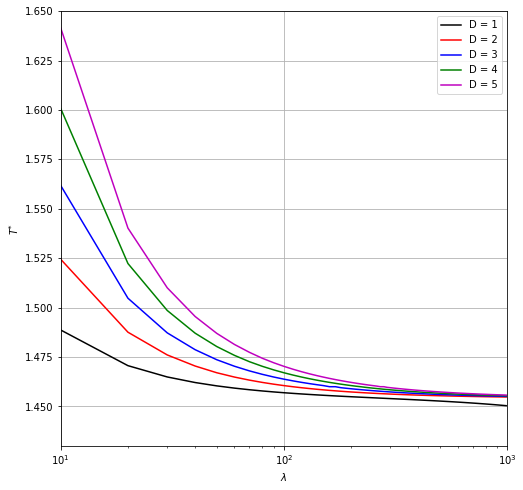

In [315]:
plt.rcParams["figure.figsize"] = (8,8)
plt.xlim(10, 1000)
plt.ylim(1.43, 1.65)
plt.xlabel("$\lambda$")
plt.ylabel("$T^{*}$")
plt.semilogx(xx, f1, "-", color = 'k', label = "D = 1")
plt.semilogx(xx, f2, "-", color = 'r', label = "D = 2")
plt.semilogx(xx, f3, "-", color = 'b', label = "D = 3")
plt.semilogx(xx, f4, "-", color = 'g', label = "D = 4")
plt.semilogx(xx, f5, "-", color = 'm', label = "D = 5")
plt.grid(b=None, which='major', axis='both')
plt.legend()